# Implementasjon av numeriske integrasjonsmetoder

I denne teksten skal vi implementere og teste midtpunktmetoden og trapesregelen i Python. For å skrive konsis kode i Python kommer vi til å lagre numpy arrayer til å representere

* partisjonen av intervallet $[a,b]$ som arrayen $x = [x_0, x_1, \ldots, x_n]$

* integrand-verdiene $[f(x_0), f(x_1), \ldots, f(x_n)]$, som vi trenger i den numeriske metoden.  

En numpy.ndarray er en liste med lagrede verdier (typisk floats) som man kan endre verdiene til ved beregninger. I Python egner arrayer seg bedre til numeriske beregninger enn for eksempel datatypen list. Noen eksempler på hvordan arrayer kan brukes i python følger under:

In [1]:
#importerer moduler som vi trenger (disse lastest i alle kodesnutter som følger)
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("En liste med heltall fra 0 til (men ikke med) n skapes ved å kalle range(n):" )
y = np.arange(10)
print(y)

# Vi kaller np.arange() for aa skape en array y, 
# numpy.ndarray er en annen datatype enn en liste
print("Datatypen til y:  " + str(type(y))) 
print("Datatypen til listen [0,1,2,3]:  " + str(type([0,1,2,3])))

# utskriften fra kjøring av denne filsnutten i Python følger under:

En liste med heltall fra 0 til (men ikke med) n skapes ved å kalle range(n):
[0 1 2 3 4 5 6 7 8 9]
Datatypen til y:  <class 'numpy.ndarray'>
Datatypen til listen [0,1,2,3]:  <class 'list'>


In [4]:
print("Elementet ved indeks k i arrayen fås ved y[k]:")
print(y[0], y[3], y[6])

print("Elementene fra indeks 1 til (men ikke med) indeks 4 fås ved y[1:4]:")
print(y[1:4])  

print("Annenhvert element fra indeks i til (men ikke med) indeks j i arrayen fås ved y[i:j:2]:")
print(y[3:9:2])  


Elementet ved indeks k i arrayen fås ved y[k]:
0 3 6
Elementene fra indeks 1 til (men ikke med) indeks 4 fås ved y[1:4]:
[1 2 3]
Annenhvert element fra indeks i til (men ikke med) indeks j i arrayen fås ved y[i:j:2]:
[3 5 7]


In [5]:
print("sum(y) gir summen av alle elementene i y:")
print(sum(y))

print("Multiplikasjon av arrayen c*y hvor c er en konstant gir resultatet c*y = [c*y[0], c*y[1], ..., c*y[n]]:")
print(0.5*y)

print("Funksjonsevaluering av arrayen f(y) gir, om man bruker funksjoner fra numpy modulen, elementvis funksjonsevaluering: f(y) = [f(y[0]), f(y[1]), ..., f(y[n])]")
def f(x):
    return np.power(x,2); ## skaper funksjonen f(x) = x^2
print(f(y))
# utskrift fra kjøring:

sum(y) gir summen av alle elementene i y:
45
Multiplikasjon av arrayen c*y hvor c er en konstant gir resultatet c*y = [c*y[0], c*y[1], ..., c*y[n]]:
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Funksjonsevaluering av arrayen f(y) gir, om man bruker funksjoner fra numpy modulen, elementvis funksjonsevaluering: f(y) = [f(y[0]), f(y[1]), ..., f(y[n])]
[ 0  1  4  9 16 25 36 49 64 81]


# Midtpunktmetoden

La oss approksimere integralet 
$$I = \int_{-1}^4 \sin(\pi x) +1 dx = 5 - \frac{\cos(-4 \pi) - \cos(\pi)}{\pi} = 5 - \frac{2}{\pi}$$

Vi skriver $f(x) = \sin( \pi x)$. 

Midtpunktmetoden (med uniform steglendge) er gitt ved 
$$I_{midt}(n) = \sum_{i=1}^n f(x_{i-1/2}) h$$

hvor $h = 5/n$, $x_i = i h$ og $x_{i-1/2} = -1 + (x_{i-1} + x_i)/2$. 

Feilestimat 
$$|I - I_{midt}(n) | \le \frac{(4 - (-1))}{24} \max_{x \in [-1,4]} |f''(x)| \, h^2  =  \frac{5 \pi^2 }{24} \, h^2 $$ 

Implementasjon i Python: 

In [6]:
def f(x): 
    return np.sin(np.pi*x)+1;

I = 5- 2/np.pi # eksakt losning 

def midtpunktmetoden(n):
    h =5. /n; # h = (4 -(-1))/n
    x = -1.+np.arange(0,n+1)*h; # uniform partisjon x = [0 h 2h ... nh=1];
    x_midt = (x[0:n] + x[1:])/2 # midtpunktene xMid = [x_{1/2}  x_{3/2} ... x_{n/2}]
    I_midt = sum(f(x_midt))*h;
    return I_midt

print("  n     I_midt        |I - I_midt|")

n=4; 
for k in range(8):
    I_midt = midtpunktmetoden(n);

    print("%4d    %2.8f     %2.8f" % (n, I_midt, abs(I_midt - I)))
    n = n*2; # dobler n før neste beregning.

print("\n Observer at |I - I_midt(2n)|/|I - I_midt(n)| approx 1/4")

  n     I_midt        |I - I_midt|
   4    3.64700975     0.71637048
   8    4.24831889     0.11506134
  16    4.33707645     0.02630378
  32    4.35694343     0.00643679
  64    4.36177952     0.00160071
 128    4.36298058     0.00039965
 256    4.36328035     0.00009988
 512    4.36335526     0.00002497

 Observer at |I - I_midt(2n)|/|I - I_midt(n)| approx 1/4


Figuren under viser hvordan midtpunktmetoden approksimerer integralet for ulike $n$-verdier (detaljer i koden er ikke viktig). 

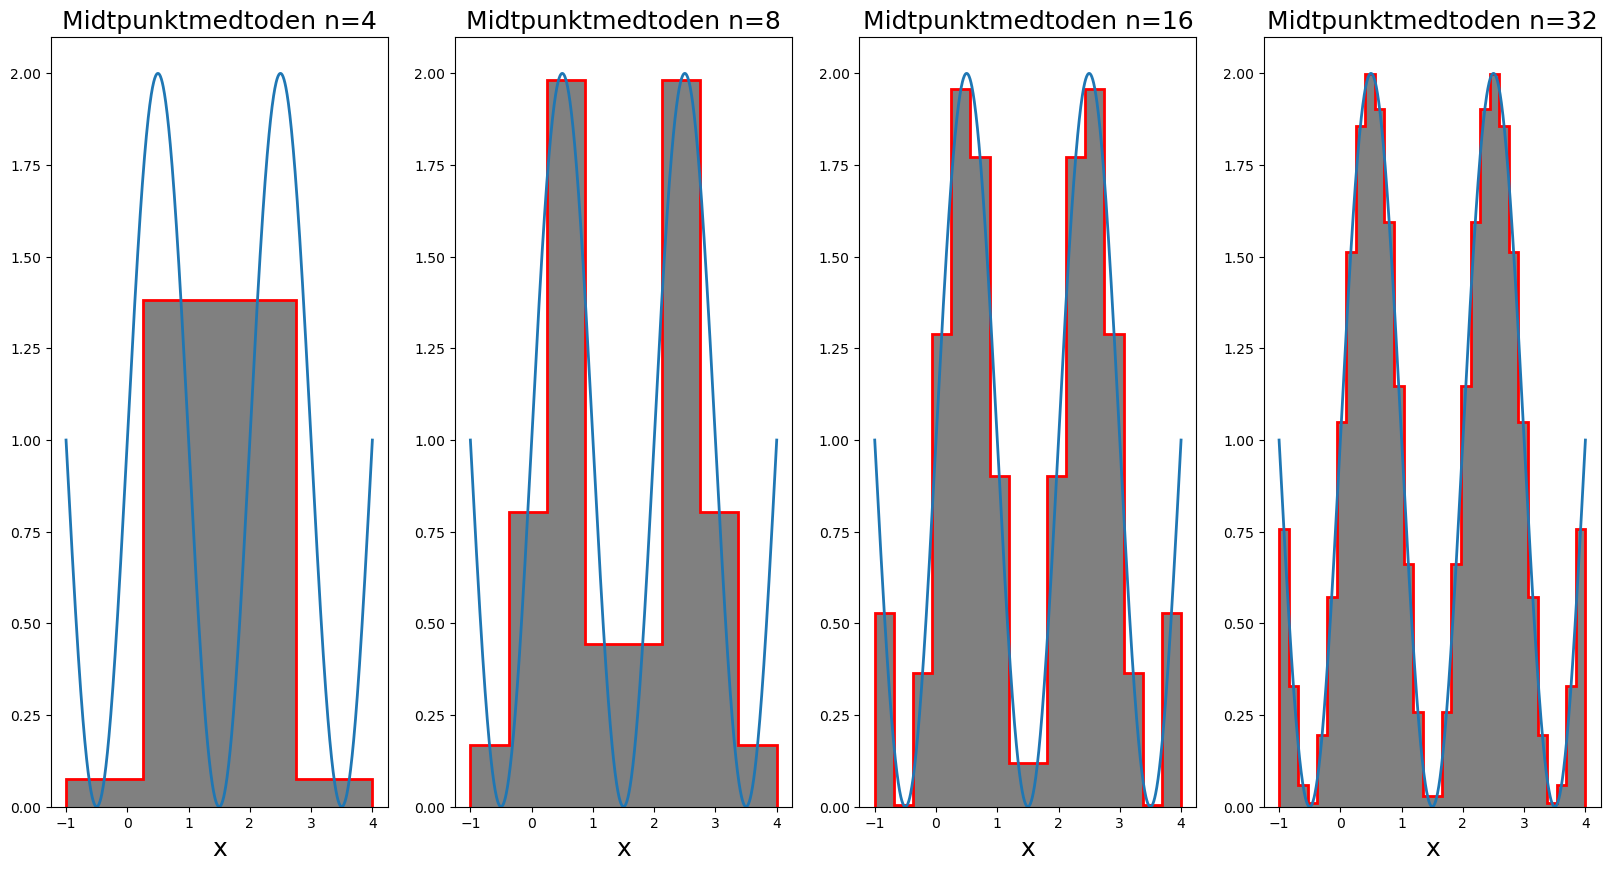

In [7]:
xFine = np.linspace(-1,4,1000); #"referansegitter" -- veldig fint
z = f(xFine); #verdiene til f på gitteret.


n =4
fig, ax = plt.subplots(1, 4, figsize=(20,10))
for k in range(4):

    x = np.linspace(-1,4,n+1); #gitter med steglengde h= 5/n.
    xMid = (x[0:n]+x[1:])/2.
    yMid = f(xMid); #midtpunktmetodens integrasjonsverdier over hvert steg
    ax[k].plot(xFine,z,linewidth=2)# grafen til f(x)
    ax[k].stairs(yMid,x, fill=True, color='grey')# grafen til trapesarealet
    ax[k].stairs(yMid,x, color='red', linewidth =2)
    
    #titleString = "n="+str(n)
    ax[k].set_title("Midtpunktmedtoden n=" + str(n), fontsize=18)
    ax[k].set_xlabel("x", fontsize=18)

    n = 2*n


# Trapesregelen

Vi approksimerer igjen integralet $I$ gitt i teksten over om midtpunktmetoden, denne gangen med trapesregelen:  

$$I_{trap}(n) = h \Big( \frac{f(x_0) + f(x_n)}{2} + \sum_{i=1}^{n-1} f(x_{i}) \Big) $$

hvor $h = 5/n$ og $x_i = -1 +i h$.

Feilestimat $$|I - I_{trap}(n) | \le  \max_{x \in [-1,4]} |f''(x)| \, \frac{5 h^2}{12} = \frac{5 \pi^2 }{12} h^2$$ 

Implementasjon i Python: 

In [8]:
def f(x): 
    return np.sin(np.pi*x)+1;

I = 5- 2/np.pi # eksakt losning 

def trapesregelen(n):
    h =5. /n;
    #partisjon x = -1+ [0 1 ... n]*h = [-1 (-1+h) (-1+2h) ... (-1+nh)=1];
    x = -1+np.arange(0,n+1)*h; 
    I_trap = h*(  (f(x[0])+f(x[n]))/2 + sum(f(x[1:n]))  )
    return I_trap

print("  n     I_trap      |I - I_trap|")
n=4; 
for k in range(8):
    I_trap = trapesregelen(n);

    print("%3d    %1.7f     %1.7f" % (n, I_trap, abs(I_trap - I)))
    n = n*2; # dobler n før neste beregning.

print("\n Observer at |I - I_trap(2n)|/|I - I_trap(n)| approx 1/4")

  n     I_trap      |I - I_trap|
  4    5.5177670     1.1543867
  8    4.5823884     0.2190081
 16    4.4153536     0.0519734
 32    4.3762150     0.0128348
 64    4.3665792     0.0031990
128    4.3641794     0.0007991
256    4.3635800     0.0001997
512    4.3634302     0.0000499

 Observer at |I - I_trap(2n)|/|I - I_trap(n)| approx 1/4


Figuren under viser hvordan trapesregelen approksimerer integralet for ulike $n$-verdier (detaljer i koden er ikke viktig). 

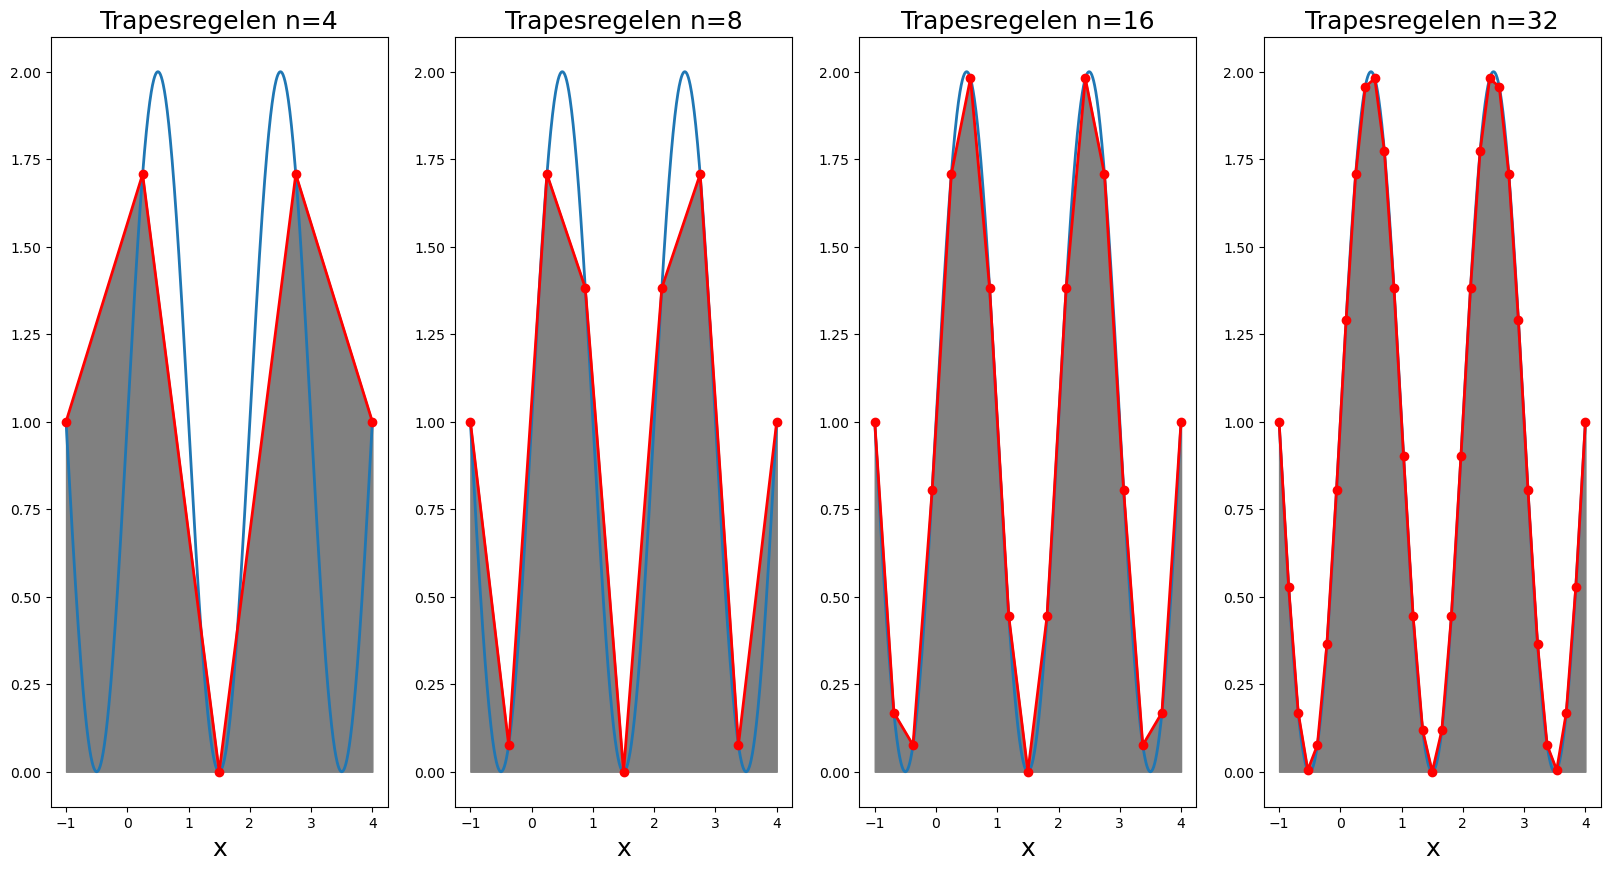

In [7]:
xFine = np.linspace(-1,4,1000); #"referansegitter" -- veldig fint
z = f(xFine); #verdiene til f på gitteret.


n =4
fig, ax = plt.subplots(1, 4, figsize=(20,10))
for k in range(4):

    x = np.linspace(-1,4,n+1); #trapesregel gitter med steglengde h= 2/n.
    y = f(x);
    ax[k].plot(xFine,z,linewidth=2)# grafen til f(x)
    ax[k].plot(x,y,'r',x,y,'ro', linewidth=2)# grafen til trapesarealet
    ax[k].fill_between(x,y,y2=0,color='gray') #farger trapesarealet grått 

    #titleString = "n="+str(n)
    ax[k].set_title("Trapesregelen n=" + str(n), fontsize=18)
    ax[k].set_xlabel("x", fontsize=18)

    n = 2*n


# Simpsons regel

For approksimasjon av integralet $I$ over er Simpsons regel gitt ved  
$$I_{simp}(2n) = \frac{h}{3} \Big( f(x_0) + f(x_n) + 4\sum_{i=1}^{n} f(x_{2i-1})  + 2\sum_{i=1}^{n-1} f(x_{2i}) \Big) $$

hvor $h = 2/(2n)$ og $x_i = -1 +i h$ for $i=0,1,\ldots, 2n$.

Feilestimat $$|I - I_{simp}(2n) | \le \frac{(b-a)\max_{x \in [-1,4]} |f^{(4)}(x)| h^4}{180}= ? $$ 



In [8]:
#Oppgave for spesielt interesserte: implementer og test simpsons regel i Python
